In [1]:
import sys
import time
import numpy as np
import numba as nb
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
PathWindows = r"D:\Учеба\Практика\Диплом\gamma"
LibraryPathWindows = r"D:\Учеба\Практика\Диплом\gamma\SpectrumsMeasurementsLibrary"
LibraryPathLinux = r"/home/danis/work/python_works/gamma"
sys.path.insert(0, LibraryPathWindows)
sys.path.insert(0, PathWindows)
sys.path.insert(0, LibraryPathLinux)

In [3]:
from GammaRayInteractions.Materials import Material, R
from CrossSectionsLibrary.cross_sections_data import ENERGY_MESH
from MeasurementInstrumentation.measurement_techniques import ideal_transmission_function, \
k_edge_method_transmission_function, ross_method_transmission_function, edges_indices, open_detector
from NumericalMethods.simpson_rule import simpson_rule
from NumericalMethods.unfolding_technique import Gold

import matplotlib.ticker as mticker
from local_scripts import initialization_brem, generate_empty_matrix, complete_empty_matrix, integrate_the_row, get_integral_signals, apply_function_to_matrix

In [4]:
font_properties = {'family' : 'Arial', 'weight' : 'regular', 'size' : 14}
rc('font', **font_properties)

Инициализация спектра

In [5]:
z = 50
beam_energy = 0.075
brem = initialization_brem(z, beam_energy)

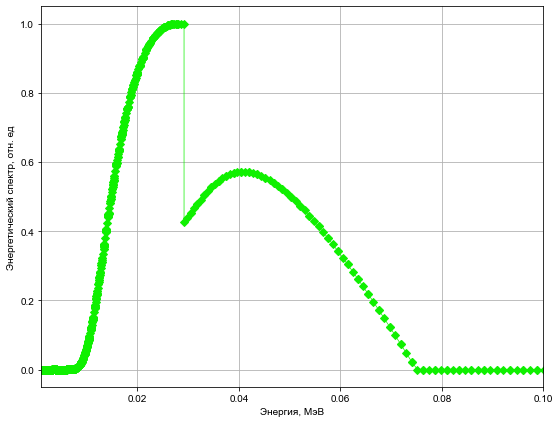

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(ENERGY_MESH, brem, ls='-', marker='D', lw='0.7', ms=5, color='#0FF000')

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Энергетический спектр, отн. ед')
ax.tick_params(axis='both')

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.10e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Уровни пропускания системы

In [7]:
levels = np.linspace(0.001, 0.9, 51)

Инициализация измерительных каналов

In [8]:
first_channel = 11
last_channel = 100 
number_of_channels = last_channel - first_channel + 1

In [9]:
# создание измерительных систем с различными уровнями пропускания
MEASURING_SYSTEMS = []
channel_with_open_detector = open_detector() # канал с открытым детектором

st = time.time() # начальное время
for ind, level in enumerate(levels):
    ROSS_METHOD_channels = [ross_method_transmission_function(num, num+1, level) for num in range(first_channel, last_channel)]
    ROSS_METHOD_channels.insert(0, channel_with_open_detector) # добавление канала с открытым детектором
    MEASURING_SYSTEMS.append(ROSS_METHOD_channels)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 1.469 секунд
Выполнено: 2 из 51. Текущее время выполнения: 2.943 секунд
Выполнено: 3 из 51. Текущее время выполнения: 4.414 секунд
Выполнено: 4 из 51. Текущее время выполнения: 5.951 секунд
Выполнено: 5 из 51. Текущее время выполнения: 7.457 секунд
Выполнено: 6 из 51. Текущее время выполнения: 8.906 секунд
Выполнено: 7 из 51. Текущее время выполнения: 10.347 секунд
Выполнено: 8 из 51. Текущее время выполнения: 11.804 секунд
Выполнено: 9 из 51. Текущее время выполнения: 13.245 секунд
Выполнено: 10 из 51. Текущее время выполнения: 14.974 секунд
Выполнено: 11 из 51. Текущее время выполнения: 16.384 секунд
Выполнено: 12 из 51. Текущее время выполнения: 17.795 секунд
Выполнено: 13 из 51. Текущее время выполнения: 19.194 секунд
Выполнено: 14 из 51. Текущее время выполнения: 20.629 секунд
Выполнено: 15 из 51. Текущее время выполнения: 22.067 секунд
Выполнено: 16 из 51. Текущее время выполнения: 23.514 секунд
Выполнено: 17 из 51. Текущее время выпо

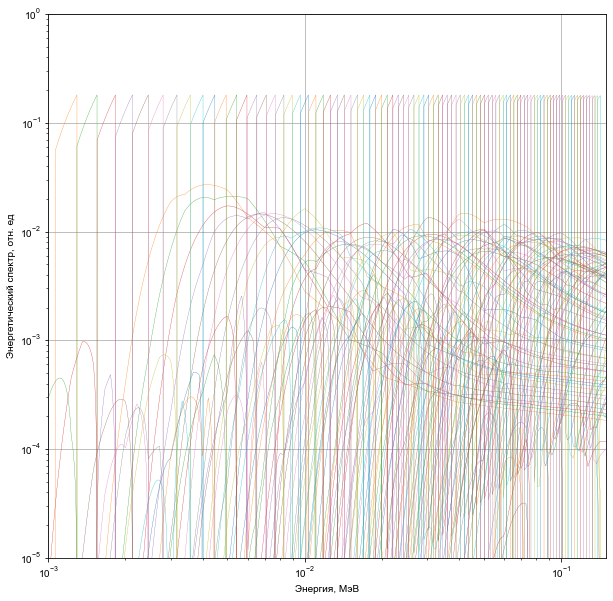

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

system_num = 10
system = MEASURING_SYSTEMS[system_num]

for r in system:
    ax.plot(ENERGY_MESH, r, ls='-', lw='0.3', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Энергетический спектр, отн. ед')
ax.tick_params(axis='both')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-3, 0.15)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Создание матриц измерительных систем

In [11]:
# создание матриц измерительных систем с различными уровнями пропускания
MEASURING_SYSTEMS_MATRIX = []

st = time.time() # начальное время
for ind, system in enumerate(MEASURING_SYSTEMS):
    matrix = [simpson_rule(r, regime='c', function_jumps=[]) for r in system] # создание матрицы одной системы
#     matrix = np.array([simpson_rule(r, regime='c', function_jumps=[]) for r in system]) # нужно так
    MEASURING_SYSTEMS_MATRIX.append(matrix)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 3.093 секунд
Выполнено: 2 из 51. Текущее время выполнения: 6.756 секунд
Выполнено: 3 из 51. Текущее время выполнения: 9.878 секунд
Выполнено: 4 из 51. Текущее время выполнения: 12.994 секунд
Выполнено: 5 из 51. Текущее время выполнения: 16.052 секунд
Выполнено: 6 из 51. Текущее время выполнения: 19.074 секунд
Выполнено: 7 из 51. Текущее время выполнения: 22.157 секунд
Выполнено: 8 из 51. Текущее время выполнения: 25.203 секунд
Выполнено: 9 из 51. Текущее время выполнения: 28.235 секунд
Выполнено: 10 из 51. Текущее время выполнения: 31.301 секунд
Выполнено: 11 из 51. Текущее время выполнения: 34.341 секунд
Выполнено: 12 из 51. Текущее время выполнения: 37.396 секунд
Выполнено: 13 из 51. Текущее время выполнения: 40.491 секунд
Выполнено: 14 из 51. Текущее время выполнения: 43.577 секунд
Выполнено: 15 из 51. Текущее время выполнения: 46.668 секунд
Выполнено: 16 из 51. Текущее время выполнения: 49.754 секунд
Выполнено: 17 из 51. Текущее время в

Измерение спектра

In [13]:
new_mesh = np.array(simpson_rule(MEASURING_SYSTEMS[0][0], regime='m', function_jumps=[]))
new_brem = np.interp(new_mesh, ENERGY_MESH, brem)

In [14]:
# создание матриц измерительных систем с различными уровнями пропускания
MEASURING_SYSTEMS_SIGNALS = []

st = time.time() # начальное время
for ind, matrix in enumerate(MEASURING_SYSTEMS_MATRIX):
    signals = np.array(matrix) @ new_brem # вычисление фильтрационной кривой одной системы
    MEASURING_SYSTEMS_SIGNALS.append(signals)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 0.002 секунд
Выполнено: 2 из 51. Текущее время выполнения: 0.003 секунд
Выполнено: 3 из 51. Текущее время выполнения: 0.004 секунд
Выполнено: 4 из 51. Текущее время выполнения: 0.004 секунд
Выполнено: 5 из 51. Текущее время выполнения: 0.005 секунд
Выполнено: 6 из 51. Текущее время выполнения: 0.005 секунд
Выполнено: 7 из 51. Текущее время выполнения: 0.006 секунд
Выполнено: 8 из 51. Текущее время выполнения: 0.006 секунд
Выполнено: 9 из 51. Текущее время выполнения: 0.007 секунд
Выполнено: 10 из 51. Текущее время выполнения: 0.007 секунд
Выполнено: 11 из 51. Текущее время выполнения: 0.008 секунд
Выполнено: 12 из 51. Текущее время выполнения: 0.008 секунд
Выполнено: 13 из 51. Текущее время выполнения: 0.008 секунд
Выполнено: 14 из 51. Текущее время выполнения: 0.009 секунд
Выполнено: 15 из 51. Текущее время выполнения: 0.009 секунд
Выполнено: 16 из 51. Текущее время выполнения: 0.01 секунд
Выполнено: 17 из 51. Текущее время выполнения: 0.0

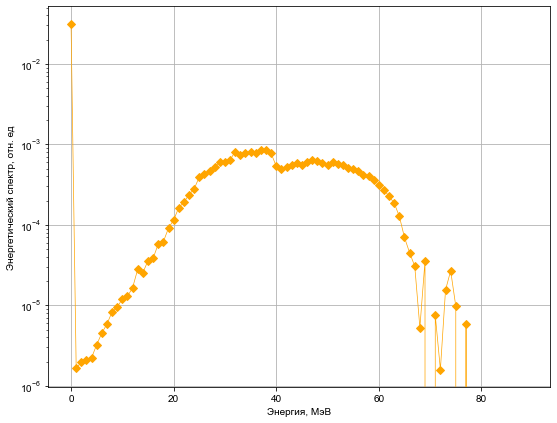

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))

signals_num = 45
ax.plot(list(range(number_of_channels)), MEASURING_SYSTEMS_SIGNALS[signals_num], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Восстановление спектра

In [40]:
num = 40
Matrix = np.array(MEASURING_SYSTEMS_MATRIX[num]) 
new_mesh = np.array(simpson_rule(MEASURING_SYSTEMS[num][0], regime='m', function_jumps=[]))

In [41]:
signals_simpson = MEASURING_SYSTEMS_SIGNALS[num]
bound_100_kev = Material(100).k_edge_index()

In [48]:
result = Gold(Matrix, signals_simpson, 1, ENERGY_MESH, new_mesh, brem, iteration_number=10000, bound=bound_100_kev, journal=False, weight_mode='channel')

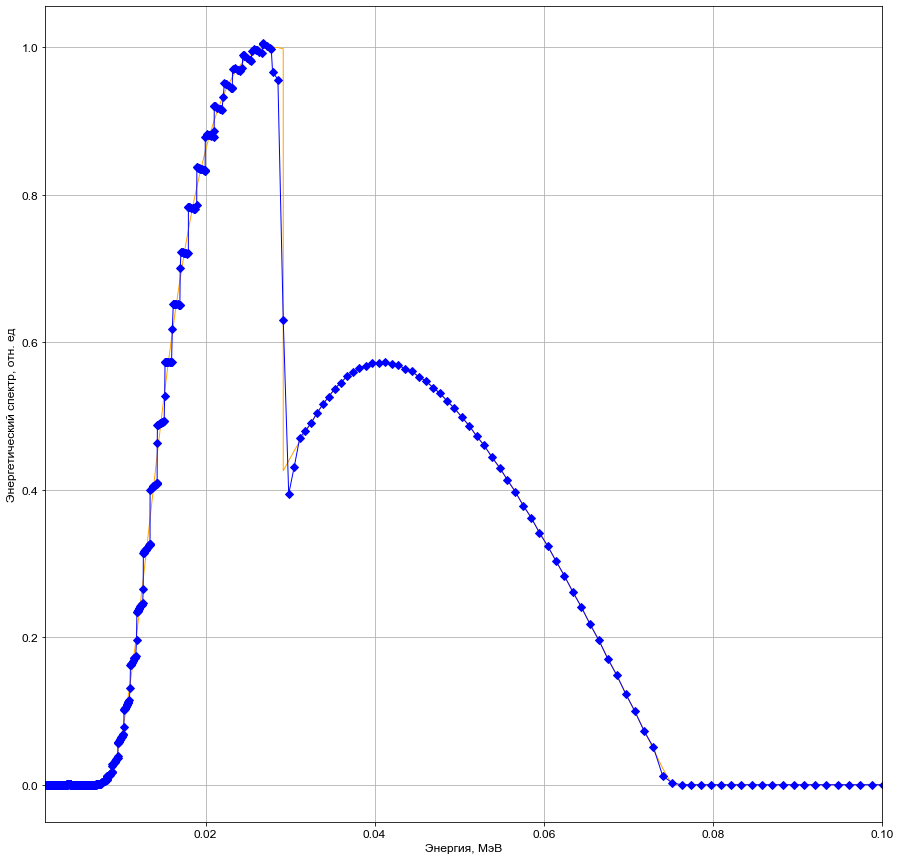

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(ENERGY_MESH, brem, ls='-', lw='1', ms=5, color='orange')
ax.plot(new_mesh, result[0], ls='-', lw='1', marker='D', ms=5, color='blue')


# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

In [54]:
# создание матриц измерительных систем с различными уровнями пропускания
RESULTS = []

st = time.time() # начальное время
for ind, matrix in enumerate(MEASURING_SYSTEMS_MATRIX):
    result = Gold(np.array(matrix), MEASURING_SYSTEMS_SIGNALS[ind], 1, ENERGY_MESH, new_mesh, brem, iteration_number=10000, bound=bound_100_kev, journal=False, weight_mode='channel')
    RESULTS.append(result)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 3.064 секунд
Выполнено: 2 из 51. Текущее время выполнения: 6.35 секунд
Выполнено: 3 из 51. Текущее время выполнения: 9.349 секунд
Выполнено: 4 из 51. Текущее время выполнения: 12.335 секунд
Выполнено: 5 из 51. Текущее время выполнения: 15.382 секунд
Выполнено: 6 из 51. Текущее время выполнения: 18.568 секунд
Выполнено: 7 из 51. Текущее время выполнения: 21.627 секунд
Выполнено: 8 из 51. Текущее время выполнения: 24.618 секунд
Выполнено: 9 из 51. Текущее время выполнения: 27.644 секунд
Выполнено: 10 из 51. Текущее время выполнения: 30.684 секунд
Выполнено: 11 из 51. Текущее время выполнения: 33.711 секунд
Выполнено: 12 из 51. Текущее время выполнения: 36.751 секунд
Выполнено: 13 из 51. Текущее время выполнения: 39.791 секунд
Выполнено: 14 из 51. Текущее время выполнения: 42.805 секунд
Выполнено: 15 из 51. Текущее время выполнения: 45.877 секунд
Выполнено: 16 из 51. Текущее время выполнения: 49.139 секунд
Выполнено: 17 из 51. Текущее время вы

Зависимость ошибки восстановления от уровня пропускания

In [56]:
DEVIATIONS = [results[1] for results in RESULTS]

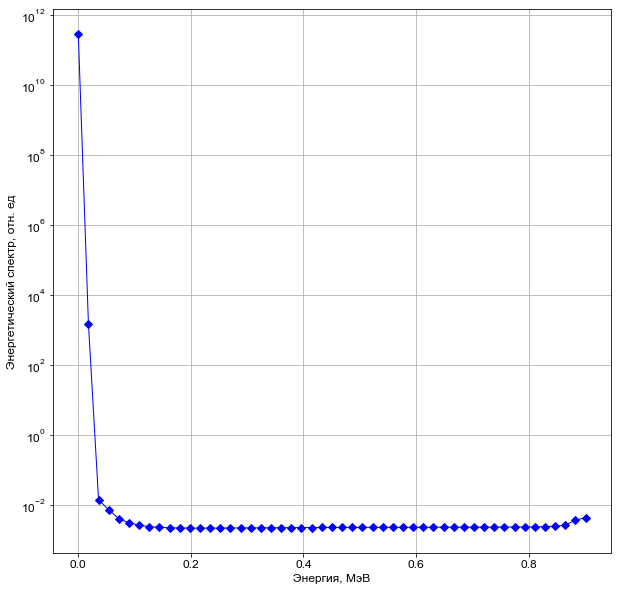

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(levels, DEVIATIONS, ls='-', lw='1', marker='D', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)

Сохранение результатов

In [59]:
np.save('ИЗМЕРИТЕЛЬНЫЕ_СИСТЕМЫ_С_РАЗНЫМИ_ПРОПУСКАНИЯМИ_Р.npy', MEASURING_SYSTEMS)

In [60]:
np.save('МАТРИЦЫ_ИЗМЕРИТЕЛЬНЫХ_СИСТЕМ_С_РАЗНЫМИ_ПРОПУСКАНИЯМИ_Р.npy', MEASURING_SYSTEMS_MATRIX)

In [126]:
np.save('УРОВНИ_ПРОПУСКАНИЯ.npy', levels)